# Everything Start With Data Code



### data import

In [ ]:
import psycopg2
import pandas as pd
# define the connection parameters
dbname = 'everything2023'
user = 'uqf4909'
password = 'Avrilzyx20001130!'
host = 'pg.analytics.northwestern.edu'
port = '5432' # this is the postgres port

In [3]:
# create a connection
connection = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=password,
    host=host,
    port=port
)

# create a cursor
cursor = connection.cursor()

In [10]:
import pandas as pd
cursor.execute("SELECT * FROM group_13.skstinfo TABLESAMPLE SYSTEM(10);")
result = cursor.fetchall()

pd.DataFrame(result)
column_names = [desc[0] for desc in cursor.description]
skstin = pd.DataFrame(result, columns=column_names)
skstin

,SKU,STORE,COST,RETAIL,unknown
0,78,3003,24.30,58.00,0
1,78,3103,24.30,58.00,0
2,78,3502,24.30,40.20,0
3,78,3702,24.30,40.20,0
4,78,3802,24.30,40.20,0
...,...,...,...,...,...
3909422,9999992,2104,4.20,14.00,0
3909423,9999992,2109,4.20,14.00,0
3909424,9999992,2203,4.20,14.00,0
3909425,9999992,2204,4.20,14.00,0


In [11]:
skstin.describe()

,SKU,STORE,unknown
count,3.909427e+06,3.909427e+06,3.909427e+06
mean,4.938014e+06,4.506759e+03,6.279616e-02
std,2.861921e+06,2.809787e+03,2.425960e-01
min,7.800000e+01,1.000000e+02,0.000000e+00
25%,2.478717e+06,2.202000e+03,0.000000e+00
50%,4.880966e+06,4.207000e+03,0.000000e+00
75%,7.418512e+06,7.007000e+03,0.000000e+00
max,9.999992e+06,9.909000e+03,1.000000e+00


In [15]:
cursor.execute("SELECT * FROM group_13.strinfo;")
result1 = cursor.fetchall()

pd.DataFrame(result1)
column_names = [desc[0] for desc in cursor.description]
strin = pd.DataFrame(result1, columns=column_names)
strin

,store,city,state,zip,x
0,2,ST. PETERSBURG,FL,33710,0
1,3,ST. LOUIS,MO,63126,0
2,4,LITTLE ROCK,AR,72201,0
3,7,FORT WORTH,TX,76137,0
4,9,TEMPE,AZ,85281,0
...,...,...,...,...,...
448,9808,GILBERT,AZ,85233,0
449,9812,METAIRIE,LA,70006,0
450,9900,LITTLE ROCK,AR,72201,0
451,9906,LITTLE ROCK,AR,72201,0


In [17]:
cursor.execute("SELECT * FROM group_13.trnsact TABLESAMPLE SYSTEM(1);;")
result2 = cursor.fetchall()

pd.DataFrame(result2)
column_names = [desc[0] for desc in cursor.description]
trn = pd.DataFrame(result2, columns=column_names)
trn

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,Unknow
0,3,202,290,1100,326708721,2005-01-18,P,1,0.00,30.00,30.00,3500000,818,0
1,3,202,540,2700,326708721,2005-01-29,R,1,0.00,30.00,30.00,15200000,818,0
2,3,303,500,2100,23702074,2004-08-18,P,1,0.00,12.00,12.00,4600000,48,0
3,3,709,360,500,0,2005-08-14,P,1,0.00,30.00,30.00,6500000,818,0
4,3,802,660,400,0,2005-08-09,P,1,440.00,30.00,30.00,4700000,599,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213689,9999950,7103,460,1300,0,2004-09-15,P,1,13.50,13.50,13.50,27400080,281,0
1213690,9999950,7103,460,1400,513308900,2004-10-03,P,1,13.50,13.50,13.50,24800163,281,0
1213691,9999950,7103,460,1600,0,2005-04-14,P,1,13.50,13.50,13.50,506900066,281,0
1213692,9999950,7103,460,1900,730701281,2005-01-21,P,1,13.50,13.50,13.50,540100084,281,0


In [59]:
cursor.execute("SELECT * FROM group_13.skuinfo2 TABLESAMPLE SYSTEM(1);;")
result3 = cursor.fetchall()

pd.DataFrame(result3)
column_names = [desc[0] for desc in cursor.description]
sku = pd.DataFrame(result3, columns=column_names)
sku

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
0,16830,5301,002,400006830001,163 CIMUB4,LT LINEN,S,1,6515973,SIGRID O
1,16834,3107,001,400006834001,LATINUPEARLP,K6199236,4PC HOSTES,1,7016438,KIRK STI
2,16845,7102,404,400006845001,10505,WARDROBE,ALL,1,4116220,J. MARCU
3,16848,5301,005,400006848001,3 4L6418,BWE,12,1,313338,KAREN KA
4,16849,4505,403,400006849001,3RG 483607,RL BLACK,32 30,1,5715232,POLO FAS
...,...,...,...,...,...,...,...,...,...,...
15555,9989353,7106,116,400009353998,520 ELEVON,PNSY PU WO,090M,1,5010255,ENZO ANG
15556,9989358,4407,007,400009358998,P668,BLACK,XXL,1,5116342,SCULLY
15557,9989359,7106,811,400009359998,LIA280EABEDE,MENAT/CO L,095M,1,5010255,ENZO ANG
15558,9989364,3103,006,400009364998,150919660819,BRIGHT OR S,13,1,2726341,TOMMY HI


In [61]:
len(sku['BRAND'].unique())

923

### data manipulation and data processiong

In [29]:
import numpy as np
# missing 100 store while sampling 1213694 rows, assume those store sales are not high and immense
len(trn['STORE'].unique())
trn['STORE'].unique()
pd.Series(trn['STORE'].unique()).sort_values().reset_index(drop=True)

0       102
1       103
2       107
3       202
4       203
       ... 
324    9704
325    9709
326    9804
327    9806
328    9909
Length: 329, dtype: int64

In [32]:
len(strin['store'].unique())
pd.Series(strin['store'].unique()).sort_values().reset_index(drop=True)

0         2
1         3
2         4
3         7
4         9
       ... 
448    9808
449    9812
450    9900
451    9906
452    9909
Length: 453, dtype: int64

In [34]:
# change name 
strin.rename(columns={'store': 'STORE'}, inplace=True)
strin

,STORE,city,state,zip,x
0,2,ST. PETERSBURG,FL,33710,0
1,3,ST. LOUIS,MO,63126,0
2,4,LITTLE ROCK,AR,72201,0
3,7,FORT WORTH,TX,76137,0
4,9,TEMPE,AZ,85281,0
...,...,...,...,...,...
448,9808,GILBERT,AZ,85233,0
449,9812,METAIRIE,LA,70006,0
450,9900,LITTLE ROCK,AR,72201,0
451,9906,LITTLE ROCK,AR,72201,0


In [38]:
# inner join the state info by store number
full = pd.merge(strin, trn, on='STORE', how='inner')
full

,STORE,city,state,zip,x,SKU,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,Unknow
0,102,TAMPA,FL,33607,1,7425,560,1300,0,2005-05-09,P,1,65.00,32.50,32.50,876100023,205,0
1,102,TAMPA,FL,33607,1,7425,810,3600,0,2005-03-06,P,1,65.00,65.00,65.00,66600063,205,0
2,102,TAMPA,FL,33607,1,7425,810,4600,316100110,2005-03-04,R,1,65.00,65.00,65.00,951400093,205,0
3,102,TAMPA,FL,33607,1,7425,810,10100,316100110,2005-02-26,P,1,65.00,65.00,65.00,480700330,205,0
4,102,TAMPA,FL,33607,1,9378,630,2900,304009382,2005-05-01,P,1,28.00,23.80,23.80,529000059,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213689,9909,CHEYENNE,WY,82009,1,9904336,860,6000,0,2005-01-01,P,1,315.00,157.50,157.50,162300060,47,0
1213690,9909,CHEYENNE,WY,82009,1,9911917,830,400,852005956,2004-09-26,P,1,38.00,9.50,9.50,109300017,165,0
1213691,9909,CHEYENNE,WY,82009,1,9968472,210,800,0,2005-06-13,P,1,39.00,29.25,29.25,384900043,511,0
1213692,9909,CHEYENNE,WY,82009,1,9968472,230,2700,0,2005-04-16,P,1,39.00,39.00,39.00,9700096,511,0


In [56]:
full1 = full.groupby('state')['ORGPRICE'].mean().reset_index().sort_values(by = 'ORGPRICE').reset_index()

<Figure size 864x576 with 0 Axes>

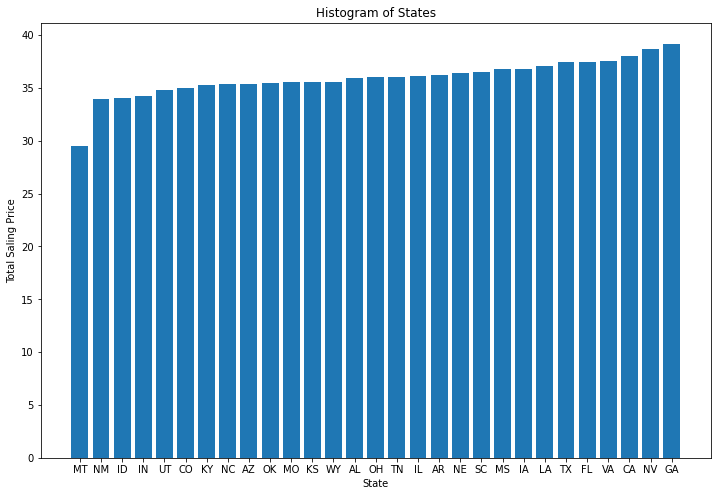

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
#full['state'].value_counts().plot(kind='bar')
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(full1['state'], full1['ORGPRICE'])
plt.title('Histogram of States')
plt.xlabel('State')
plt.ylabel('Avergae Sales Price')
plt.show()

<Figure size 864x576 with 0 Axes>

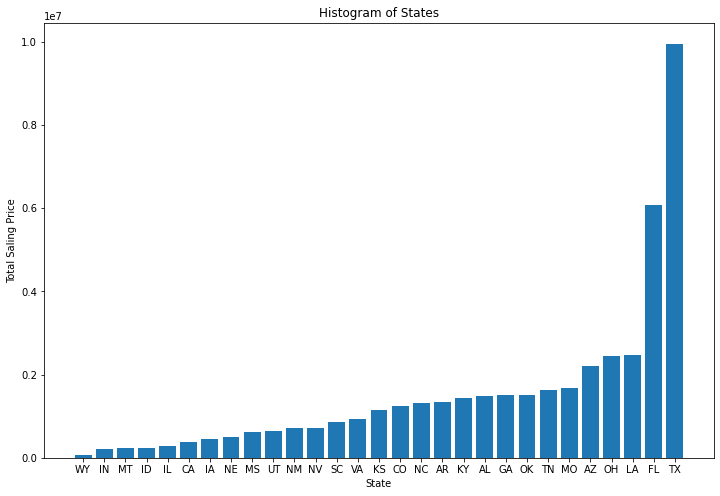

In [58]:
full2 = full.groupby('state')['ORGPRICE'].sum().reset_index().sort_values(by = 'ORGPRICE').reset_index()
plt.figure(figsize=(12, 8))
#full['state'].value_counts().plot(kind='bar')
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(full2['state'], full2['ORGPRICE'])
plt.title('Histogram of States')
plt.xlabel('State')
plt.ylabel('Total Selling Price')
plt.show()

*we can see a large sale in texas and Florida which mean Dillards focus more on TX and FL so the stores contains lots of product*

### Join SKUINFO to specify the brand and start doing prediction

In [69]:
sku['SKU'] = sku['SKU'].astype(np.int64)
fullp = pd.merge(sku, full, on='SKU', how='inner')
fullp

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,...,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,Unknow
0,16845,7102,404,400006845001,10505,WARDROBE,ALL,1,4116220,J. MARCU,...,0,2004-08-21,P,1,55.00,55.00,55.00,193300140,419,0
1,16845,7102,404,400006845001,10505,WARDROBE,ALL,1,4116220,J. MARCU,...,0,2004-10-03,P,1,55.00,55.00,55.00,282000145,419,0
2,16845,7102,404,400006845001,10505,WARDROBE,ALL,1,4116220,J. MARCU,...,171802885,2005-02-19,P,1,55.00,27.50,27.50,841600141,419,0
3,16845,7102,404,400006845001,10505,WARDROBE,ALL,1,4116220,J. MARCU,...,56402791,2004-11-10,P,1,55.00,55.00,55.00,970900055,419,0
4,16848,5301,005,400006848001,3 4L6418,BWE,12,1,313338,KAREN KA,...,0,2005-04-14,P,1,108.00,16.20,16.20,180500025,804,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13188,9871016,7200,003,400001016987,0 235730,EDT SPRAY,3.4,3,9014533,LANCASTE,...,0,2004-08-15,P,1,55.00,55.00,55.00,775700008,653,0
13189,9871016,7200,003,400001016987,0 235730,EDT SPRAY,3.4,3,9014533,LANCASTE,...,0,2004-08-07,P,1,55.00,55.00,55.00,542000019,653,0
13190,9871016,7200,003,400001016987,0 235730,EDT SPRAY,3.4,3,9014533,LANCASTE,...,0,2004-08-21,P,1,55.00,55.00,55.00,465900016,653,0
13191,9871016,7200,003,400001016987,0 235730,EDT SPRAY,3.4,3,9014533,LANCASTE,...,0,2004-12-26,R,1,55.00,55.00,55.00,623300036,653,0


In [71]:
len(sku['SKU'].unique())

15560

In [72]:
len(trn['SKU'].unique())

22474

In [67]:
sku['SKU']

0          16830
1          16834
2          16845
3          16848
4          16849
          ...   
15555    9989353
15556    9989358
15557    9989359
15558    9989364
15559    9989366
Name: SKU, Length: 15560, dtype: object